## Digits Data

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_digits
digit= load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

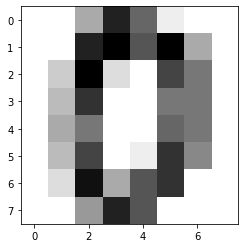

In [11]:
plt.imshow(digit.images[0], cmap='gray_r')

In [14]:
df= pd.DataFrame(digit.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
df['target']= digit.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Split model into train and test

In [26]:
X= df.drop(['target'], axis=1)
y= df.target

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf= KFold(5,True,1)

### Logistic Regression

In [32]:
lr= LogisticRegression()

lr_score= cross_val_score(lr, X, y, cv= kf, scoring= 'accuracy')
lr_mean= np.mean(lr_score)
lr_mean

0.9627174249458372

### Decision Tree

In [29]:
dt= DecisionTreeClassifier( min_samples_leaf= 2, min_samples_split= 13)

dt_score= cross_val_score(dt, X, y, cv= kf, scoring= 'accuracy')
dt_mean= np.mean(dt_score)
dt_mean

0.8330532342927885

### Support Vector Machine

In [30]:
svc= SVC(kernel= 'linear')

svm_score= cross_val_score(svc, X, y, cv= kf, scoring= 'accuracy')
svc_mean= np.mean(svm_score)
svc_mean

0.9805277004023522

### Random Forest Classifier

In [31]:
rf= RandomForestClassifier(n_estimators= 15, min_samples_leaf= 2, min_samples_split= 13)


rf_score= cross_val_score(rf, X, y, cv= kf, scoring= 'accuracy')
rf_mean= np.mean(rf_score)
rf_mean

0.948243577839678

#### So we can conclude that for Digit data set Support vector machine and Logistic regression models performed quite well.